# K-Means Clustering
#### K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

- The centroids of the K clusters, which can be used to label new data
- Labels for the training data (each data point is assigned to a single cluster)

Rather than defining groups before looking at the data, clustering allows you to find and analyze the groups that have formed organically. The "Choosing K" section below describes how the number of groups can be determined.  

Each centroid of a cluster is a collection of feature values which define the resulting groups. Examining the centroid feature weights can be used to qualitatively interpret what kind of group each cluster represents.  

#### K means works through the following iterative process:

- Pick a value for k (the number of clusters to create)
- Initialize k ‘centroids’ (starting points) in your data
- Create your clusters. Assign each point to the nearest centroid.
- Make your clusters better. Move each centroid to the center of its cluster.
- Repeat steps 3–4 until your centroids converge.

## 1.Importing Modules

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 2.Loading DataSet

In [2]:
iris = sns.load_dataset('iris')
labels = iris.species.unique()

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 3.Converting categorical data to number

In [4]:
iris["species"] = pd.Categorical(iris["species"])
iris["species"] = iris["species"].cat.codes
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## 4.Extracting feature and label data in form of X and Y

In [5]:
X = iris[['sepal_length','sepal_width']].values
y = iris.species

## 5.Creating K-Means Clustering Model

In [6]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3).fit(X)
centers = model.cluster_centers_
new_labels = model.labels_

In [7]:
print('Centroids :',centers)
print('\nLabels :',new_labels)

Centroids : [[6.81276596 3.07446809]
 [5.006      3.428     ]
 [5.77358491 2.69245283]]

Labels : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2
 0 0 0 0 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## 6.Plotting Unclustered and Clustered Data

Text(0.5, 1.0, 'Unclustered Data')

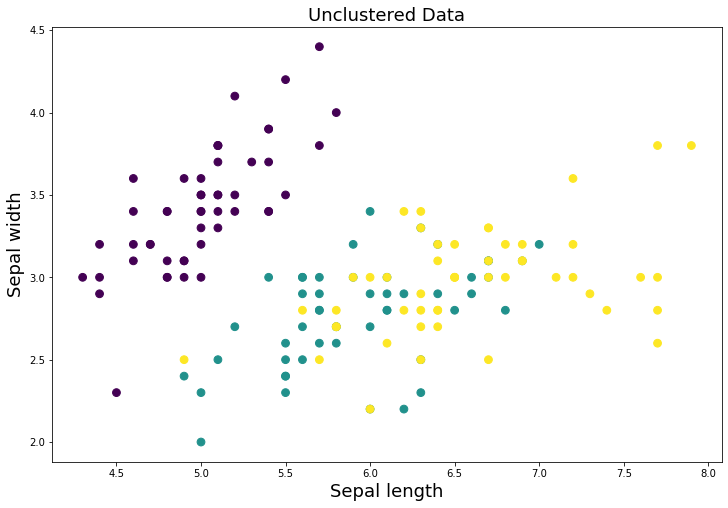

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1],c=y, s=60)
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.title('Unclustered Data',fontsize=18)

Text(0.5, 1.0, 'Clustered Data')

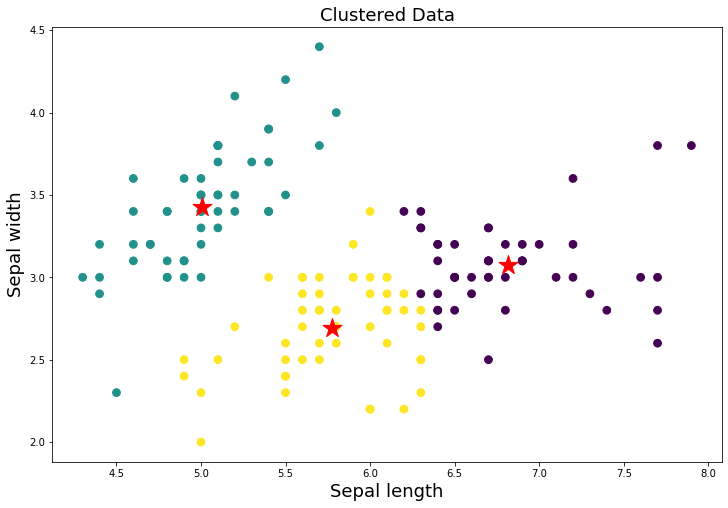

In [9]:
plt.figure(figsize=(12,8))
plt.scatter(X[:, 0], X[:, 1], c=new_labels,s=60)
plt.scatter(centers[:, 0], centers[:, 1], c='r', s=400, marker = '*', zorder=10);
plt.xlabel('Sepal length', fontsize=18)
plt.ylabel('Sepal width', fontsize=18)
plt.title('Clustered Data',fontsize=18)

## 7.Predicting Label Using Model

In [10]:
y_pred = model.predict([[2.3,5.6]])
print("Result :",labels[y_pred[0]])

Result : versicolor
